In [1]:
!pip install --upgrade jupyter-lsp
!pip install --upgrade duckduckgo-search
!pip install fastcore

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 993.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 2.8 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 5.2 MB/s eta 0:00:0000:0100:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 KB 498.1 kB/s eta 0:00:00a 0:00:01


In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *
ddgs = DDGS()

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddgs.images(term, max_results=max_images)).itemgot('image')

In [4]:
!pip install fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

Defaulting to user installation because normal site-packages is not writeable
  Using cached fastbook-0.0.29-py3-none-any.whl (719 kB)
  Using cached transformers-4.37.2-py3-none-any.whl (8.4 MB)
  Using cached ipywidgets-7.8.1-py2.py3-none-any.whl (124 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached sentencepiece-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached pandas-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached fastai-2.7.14-py3-none-any.whl (232 kB)
  Using cached datasets-2.17.1-py3-none-any.whl (536 kB)
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
  Using cached torch-2.2.0-cp310-cp310-manylinux1_x86_64.whl (755.5

In [5]:
results = search_images('grizzly bear')
len(results)

Searching for 'grizzly bear'


30

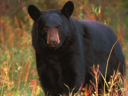

In [6]:
# ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']
ims = ['https://2.bp.blogspot.com/-ICNwA2A5vk0/T63XYuzBz8I/AAAAAAAAFtA/_QtDpGDgpg4/s1600/black_bear.jpg']
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [7]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')
if not path.exists():
    path.mkdir()
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images(f'{o} bear')
    download_images(urls=results, dest=dest)

Searching for 'grizzly bear'
Searching for 'black bear'
Searching for 'teddy bear'


In [8]:
fns = get_image_files(path)
failed = verify_images(fns)
print(failed)
failed.map(Path.unlink);


[Path('bears/grizzly/8cc395b5-0008-4368-9a37-4d369caa8171.jpg'), Path('bears/grizzly/ce13cd04-c519-41e2-9f24-31038f24dfd9.jpg'), Path('bears/grizzly/fc5c5ce7-210f-4cb5-81ac-1b0194e0ac72.jpg'), Path('bears/grizzly/163b2cef-98e8-4d5d-b079-87b3ba44b442.jpg')]


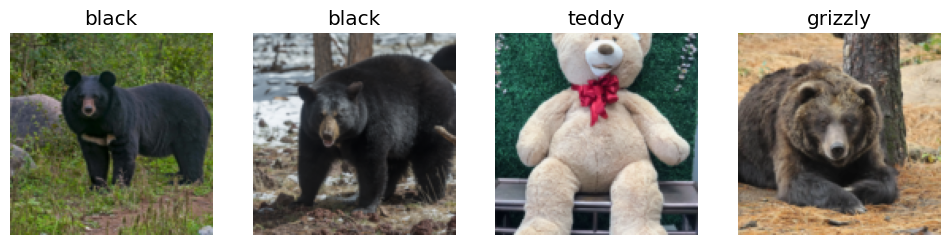

In [9]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


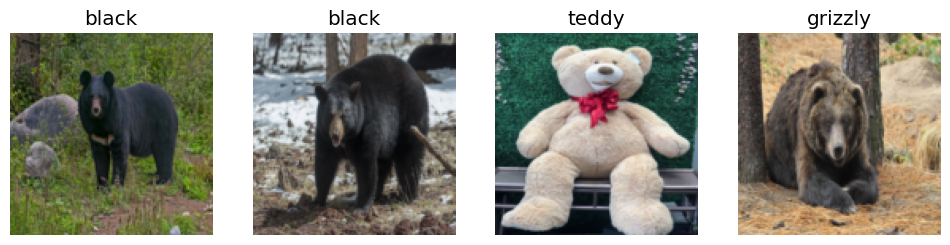

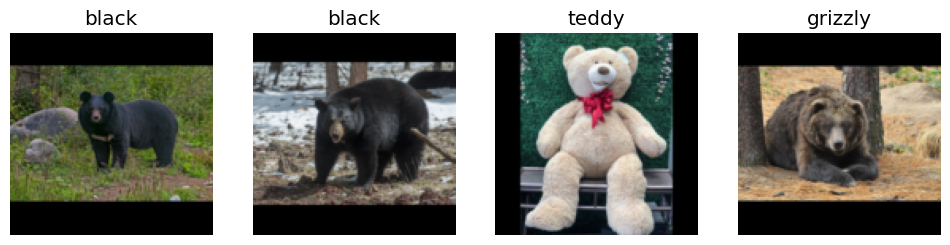

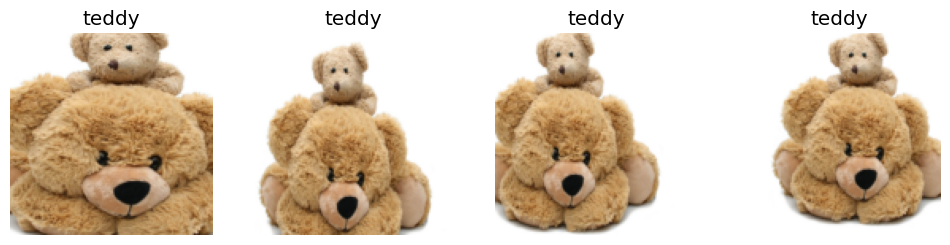

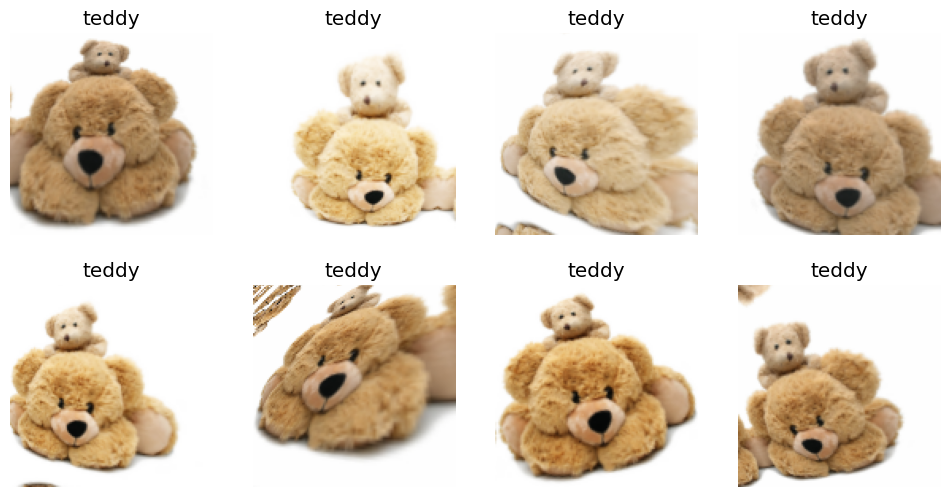

In [10]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [11]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/rgirish/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:06<00:00, 7.80MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.877482,5.062915,0.625000,00:15


epoch,train_loss,valid_loss,error_rate,time
0,1.938650,3.601217,0.625000,00:17
1,1.803605,1.668714,0.500000,00:18
2,1.319888,0.603550,0.312500,00:18
3,0.997672,0.298306,0.125000,00:17


In [13]:
learn.export('types_of_bear.pkl')

In [15]:
import os
print(os.getcwd())


/home/rgirish


In [6]:
import os
os.chdir("..")


In [7]:
import os
os.listdir()


['.ipynb_checkpoints',
 'Titanic prediction',
 'types_of_bear.pkl',
 'images',
 'bears',
 'Bear Classifier',
 'Lesson 2 on ubuntu.ipynb']

In [8]:
!find / -type d -name "Bear Classifier"


find: ‘/proc/tty/driver’: Permission denied
find: ‘/proc/1/task/1/fd’: Permission denied
find: ‘/proc/1/task/1/fdinfo’: Permission denied
find: ‘/proc/1/task/1/ns’: Permission denied
find: ‘/proc/1/fd’: Permission denied
find: ‘/proc/1/map_files’: Permission denied
find: ‘/proc/1/fdinfo’: Permission denied
find: ‘/proc/1/ns’: Permission denied
find: ‘/proc/2/task/2/fd’: Permission denied
find: ‘/proc/2/task/2/fdinfo’: Permission denied
find: ‘/proc/2/task/2/ns’: Permission denied
find: ‘/proc/2/task/7/fd’: Permission denied
find: ‘/proc/2/task/7/fdinfo’: Permission denied
find: ‘/proc/2/task/7/ns’: Permission denied
find: ‘/proc/2/fd’: Permission denied
find: ‘/proc/2/map_files’: Permission denied
find: ‘/proc/2/fdinfo’: Permission denied
find: ‘/proc/2/ns’: Permission denied
find: ‘/proc/5/task/5/fd’: Permission denied
find: ‘/proc/5/task/5/fdinfo’: Permission denied
find: ‘/proc/5/task/5/ns’: Permission denied
find: ‘/proc/5/task/6/fd’: Permission denied
find: ‘/proc/5/task/6/fdinfo’